<a href="https://colab.research.google.com/github/rahiakela/math-for-programmers/blob/main/8-understanding-rate-of-changes/1_calculating_average_flow_rate_from_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating average flow rate from volume

In this notebook, I introduce you to two of the most important concepts from calculus: **the derivative and the integral**. Both of these are operations that work with functions.

The derivative takes a function and gives you another function measuring its rate of change. The integral does the opposite; it takes a function representing a rate of change and gives you back a function measuring the original, cumulative value.

I focus on a simple example in data analysis for oil production. The set up we’ll picture is a pump lifting crude oil out of a well, which then flows through a pipe into a tank. The pipe is equipped with a meter that continuously measures the rate of fluid flow, and the tank is equipped with a sensor that detects the height of fluid in the tank and reports the volume of oil stored within.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/oil-pump.png?raw=1' width='800'/>

The volume sensor measurements tell us the volume of oil in the tank as a function of time, while the flow meter measurements tell us the volume flowing into the tank per hour, also as a function of time. In this example, the volume is the cumulative value and the flow rate is its rate of change.

Here, we solve two main problems. 

First, in our example, we start with known, cumulative volumes over time and calculate the flow rate as a function of time using the derivative. 

Second, we do the opposite task, starting with the flow rate as a function of time and calculating the cumulative volume of oil in the tank over time using the integral.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/oil-pump-flow-rate.png?raw=1' width='800'/>

Even though its big ideas aren’t that complicated or foreign, calculus gets a bad reputation because it requires so much tedious algebra. For that reason, I focus on introducing new ideas but not a lot of new techniques.



## Setup

In [1]:
!wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/8-understanding-rate-of-changes/rate_of_changes.py

--2021-01-19 11:21:03--  https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/8-understanding-rate-of-changes/rate_of_changes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1207 (1.2K) [text/plain]
Saving to: ‘rate_of_changes.py’

rate_of_changes.py  100%[===================>]   1.18K  --.-KB/s    in 0s      

2021-01-19 11:21:03 (71.6 MB/s) - ‘rate_of_changes.py’ saved [1207/1207]



In [2]:
from rate_of_changes import *

## Calculating average flow rate

Let’s start by assuming we know the
volume in the tank over time, which is
encoded as a Python function called
volume. This function takes as an
argument, the time in hours after a
predefined starting point, and returns
the volume of oil in the tank at that
time, measured in a unit called barrels
(abbreviated “bbl”).

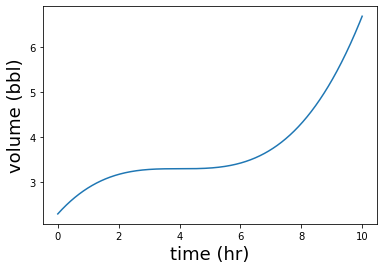

In [3]:
plot_volume(volume, 0, 10)

We want to move in the direction of finding the flow rate into the tank at any point in time, so for our first baby step, let’s calculate this in an intuitive way.

## Implementing an average_flow_rate

The word per in “barrels per hour” suggests that we’re going to do some division to get our answer. The way to calculate the average flow rate is to take the total change in volume divided by the elapsed time.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/average-flow-rate-eq.png?raw=1' width='800'/>

The elapsed time between the starting time $t_1$ and the ending time $t_2$ measured in hours is $t_2 – t_1$. If we have a function $V(t)$ that tells us volume as a function of time, the overall change in volume is the volume at $t_2$ minus the volume at $t_1$, or $V(t_2) – V(t_1)$.


<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/average-flow-rate-2-eq.png?raw=1' width='800'/>

**This is how we calculate rates of change in different contexts.**

For instance, your speed when driving a car is the rate at which you cover distance with respect to time. To calculate your average speed for a drive, you divide your total distance traveled in miles by the elapsed time in hours to get a result in miles per hour (mph).

Our formula for average flow rate depends on the volume function V and the starting and ending times $t_1$ and $t_2$, which are the parameters we’ll pass to the corresponding Python function.

```python
def average_flow_rate(v,t1,t2):
    return (v(t2) – v(t1))/(t2 – t1)
```

Now we want to know the average flow rate into the tank between the 4-hr
mark and the 9-hr mark. In this case, t1 = 4 and t2 = 9. To find the starting and ending volumes, we can evaluate the volume function at these times:

In [4]:
volume(4)

3.3

In [5]:
volume(9)

5.253125

In [6]:
average_flow_rate(volume, 4, 9)

0.390625

Rounding for simplicity, the difference between the two volumes is 5.25 bbl – 3.3 bbl = 1.95 bbl, and the total elapsed time is 9 hr – 4 hr = 5 hr. Therefore, the average flow rate into the tank is roughly 1.95 bbl divided by 5 hr or 0.39 bbl/hr.

## Picturing the average flow rate with a secant line

Another useful way to think about the average rate of change in volume over time is to look at the volume graph. Let’s focus on the two points on the volume graph between which we calculated the average flow rate.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/secant-line.png?raw=1' width='800'/>

**A line passing through two points on a graph like this is called a secant line.**

As you can see, the graph is higher at 9 hrs than at 4 hrs because the volume of oil in the tank increased during this period. **This causes the secant line connecting the starting and ending points to slope upward. It turns out the slope of the secant tells us exactly what the average flow rate is on the time interval.**

Given two points on a line, **the slope is the change in the vertical coordinate
divided by the change in the horizontal coordinate**. In this case, the vertical
coordinate goes from $V(t_1)$ to $V(t_2)$ for a change of $V(t_2) – V(t_1)$, and the horizontal coordinate goes from $t_1$ to $t_2$ for a change of $t_2 – t_1$. The slope is then $(V(t_2) – V(t_1))$ divided by $(t_2–t_1)$, exactly the same calculation as the average flow rate.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/secant-line-slope.png?raw=1' width='800'/>



## Negative rates of change

One case worth a brief mention is that the secant line can have a negative slope.

In [7]:
def decreasing_volume(t):
  if t < 5:
    return 10 - (t ** 2) / 5
  else:
    return 0.2 * (10 - t) ** 2

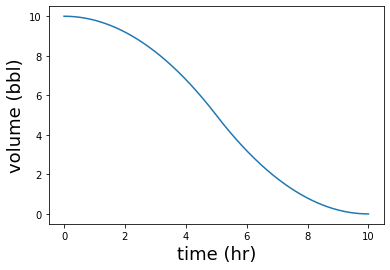

In [8]:
plot_volume(decreasing_volume, 0, 10)

This example isn’t compatible with our previous example because we don’t expect oil to be flowing out of the tank back into the ground. But it does illustrate that a secant line can go downward, for instance, from t = 0 to t = 4. On this time interval, the change in volume is –3.2 bbl.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/secant-line-neg-slope.png?raw=1' width='800'/>

In this case, the slope is –3.2 bbl divided by 4 hr or –0.8 bbl/hr. That means that the rate at which oil is entering the tank is –0.8 bbl/hr. **A more sensible way to say this is that oil is leaving the tank at a rate of 0.8 bbl/hr. Regardless of whether the volume function is increasing or decreasing, our average_flow_rate function is reliable.**

In [9]:
average_flow_rate(decreasing_volume, 0, 4)

-0.8

## Exercises

**Ex-8.2**: Write a Python function secant_line(f,x1,x2) that takes a
function f(x) and two values, x1 and x2, and that returns a new function representing
a secant line over time. For instance, if you ran line = secant_line
(f,x1,x2), then line(3) would give you the y value of the secant line at x = 3.

In [13]:
def secant_line(f, x1, x2):
  def line(x):
    return f(x1) + f(x - x1) * (f(x2) - f(x1)) / (x2 - x1)
  return line

**Ex-8.3** Write a function that uses the code from the previous exercise to
plot a secant line of a function f between two given points.

In [17]:
def plot_secant(f, x1, x2, color="k"):
  line = secant_line(f, x1, x2)
  plot_function(line, x1, x2, c=color)
  plt.scatter([x1, x2], [f(x1), f(x2)], c=color)